In [83]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from scipy.stats import linregress


In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Overview**
### There are in total 11 datasets from LoMo, in csv.
1. lomo_customers_dataset.csv
2. lomo_sellers_dataset.csv
3. lomo_geolocation_dataset.csv
4. lomo_products_dataset.csv
5. lomo_product_category_name_translation.csv
6. lomo_orders_dataset.csv
7. lomo_order_items_dataset.csv
8. lomo_order_payments_dataset.csv
9. lomo_order_reviews_dataset.csv
10. lomo_marketing_qualified_leads_dataset.csv
11. lomo_closed_deals_dataset.csv

![image-2.png](attachment:image-2.png)

In [43]:
# Setting the dir
os.chdir('/content/drive/MyDrive/data-analytics-case-study-dataset')
# Load the datasets
customers_df = pd.read_csv('001_lomo_customers_dataset.csv')
sellers_df = pd.read_csv('002_lomo_sellers_dataset.csv')
geolocation_df = pd.read_csv('003_lomo_geolocation_dataset.csv')
products_df = pd.read_csv('004_lomo_products_dataset.csv')
product_category_translation_df = pd.read_csv('005_lomo_product_category_name_translation.csv')
orders_df = pd.read_csv('006_lomo_orders_dataset.csv')
order_items_df = pd.read_csv('007_lomo_order_items_dataset.csv')
order_payments_df = pd.read_csv('008_lomo_order_payments_dataset.csv')
order_reviews_df = pd.read_csv('009_lomo_order_reviews_dataset.csv')
marketing_qualified_leads_df = pd.read_csv('010_lomo_marketing_qualified_leads_dataset.csv')
closed_deals_df = pd.read_csv('011_lomo_closed_deals_dataset.csv')

In [44]:
# Helper function to return df summary
from scipy import stats
def dfSummary(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values
    summary['Uniques'] = df.nunique().values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name]

    return summary

# **Problem Statement**
### **CMO challenge: Sales performance and prediction**
1. Which product category has the best performance and which has the highest potential?


2. If you were the Chief Marketing Officer, how would you prioritise your (2C) marketing efforts? Would your strategy differ by region (state)? (Visualising your points on a map would help)

# Data Preparation
I will first do a preliminary exploration of the data before doing data cleaning and preparation for dashboard purposes later on.


In [45]:
products_df.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40,287,1,225,16,10,14
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44,276,1,1000,30,18,20
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46,250,1,154,18,9,15
3,cef67bcfe19066a932b7673e239eb23d,bebes,27,261,1,371,26,4,26
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37,402,4,625,20,17,13


### Product Category - Portuguese
It is noted that the product category names are in Portuguese, which will require the translation to English, using the data from lomo_product_category_name_translation.csv

In [46]:
products_df = products_df.merge(product_category_translation_df,
                                left_on='product_category_name',
                                right_on='product_category_name_portugese',
                                how='left')
dfSummary(products_df)

Dataset Shape: (32340, 11)


,Name,dtypes,Missing,Uniques
0,product_id,object,0,32340
1,product_category_name,object,0,73
2,product_name_lenght,int64,0,66
3,product_description_lenght,int64,0,2960
4,product_photos_qty,int64,0,19
5,product_weight_g,int64,0,2202
6,product_length_cm,int64,0,99
7,product_height_cm,int64,0,102
8,product_width_cm,int64,0,95
9,product_category_name_portugese,object,13,71


### Product Category - Missing Translation
It is noted that there are missing product category names translations in English, where we will then do a manual override to the correct english translation.

In [47]:
products_df[products_df['product_category_name_english'].isnull()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_portugese,product_category_name_english
1581,0105b5323d24fc655f73052694dbbb3a,pc_gamer,59,621,4,2839,19,16,18,NaN,NaN
5703,6fd83eb3e0799b775e4f946bd66657c0,portateis_cozinha_e_preparadores_de_alimentos,52,280,1,1200,25,33,25,NaN,NaN
7176,5d923ead886c44b86845f69e50520c3e,portateis_cozinha_e_preparadores_de_alimentos,58,284,1,1200,25,33,25,NaN,NaN
7326,6727051471a0fc4a0e7737b57bff2549,pc_gamer,60,1532,3,650,16,22,20,NaN,NaN
8647,bed164d9d628cf0593003389c535c6e0,portateis_cozinha_e_preparadores_de_alimentos,54,382,2,850,30,21,22,NaN,NaN
10822,1220978a08a6b29a202bc015b18250e9,portateis_cozinha_e_preparadores_de_alimentos,46,280,1,1200,25,33,25,NaN,NaN
13995,ae62bb0f95af63d64eae5f93dddea8d3,portateis_cozinha_e_preparadores_de_alimentos,59,927,1,10600,40,20,38,NaN,NaN
15874,1954739d84629e7323a4295812a3e0ec,portateis_cozinha_e_preparadores_de_alimentos,58,792,4,750,30,30,30,NaN,NaN
16608,dbe520fb381ad695a7e1f2807d20c765,pc_gamer,60,840,6,800,18,22,22,NaN,NaN
17459,c7a3f1a7f9eef146cc499368b578b884,portateis_cozinha_e_preparadores_de_alimentos,52,1372,5,7350,40,30,23,NaN,NaN


The product category names that do not have an english translation are: ***'pc_gamer'*** and ***'portateis_cozinha_e_preparadores_de_alimentos'***.

***'pc_gamer'*** can remain as is, while ***'portateis_cozinha_e_preparadores_de_alimentos'*** is actually ***'portable_kitchen_and_food_preparation'***.

In [48]:
# To update 'product_category_name_english' in the 'products_df' DataFrame
products_df.loc[products_df['product_category_name'] == 'pc_gamer', 'product_category_name_english'] = 'pc_gamer'
products_df.loc[products_df['product_category_name'] == 'portateis_cozinha_e_preparadores_de_alimentos', 'product_category_name_english'] = 'portable_kitchen_and_food_preparation'

dfSummary(products_df)

Dataset Shape: (32340, 11)


,Name,dtypes,Missing,Uniques
0,product_id,object,0,32340
1,product_category_name,object,0,73
2,product_name_lenght,int64,0,66
3,product_description_lenght,int64,0,2960
4,product_photos_qty,int64,0,19
5,product_weight_g,int64,0,2202
6,product_length_cm,int64,0,99
7,product_height_cm,int64,0,102
8,product_width_cm,int64,0,95
9,product_category_name_portugese,object,13,71


In [49]:
products_df.product_category_name_english.unique()


array(['perfumery', 'arts', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'construction_tools_tools',
       'fashion_underwear_beach', 'fashion_male_clothing',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'books_technical',
       'home_a

In [50]:
# Do not need multiple category names fields, so we will drop the rest.
# Drop 'product_category_name' and 'product_category_name_portugese' columns from the DataFrame
products_df = products_df.drop(['product_category_name', 'product_category_name_portugese'], axis=1)

## Merge Related DataFrames to evaluate performance and potential.
The DFs to be merged are:
1. order_items_df
2. products_df
3. orders_df

In [51]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,19/09/2017 09:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,03/05/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,18/01/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,15/08/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,13/02/2017 13:57,199.90,18.14


### Merging of orders_items and products_df
to ensure that every item ordered is categorised into product categories.

In [52]:
# Merge datasets to get a full picture of the product performance on sales and volume
LoMo_df = (order_items_df.merge(products_df, on='product_id',how ="left"))

dfSummary(LoMo_df)

Dataset Shape: (112650, 15)


,Name,dtypes,Missing,Uniques
0,order_id,object,0,98666
1,order_item_id,int64,0,21
2,product_id,object,0,32951
3,seller_id,object,0,3095
4,shipping_limit_date,object,0,54615
5,price,float64,0,5968
6,freight_value,float64,0,6999
7,product_name_lenght,float64,1604,66
8,product_description_lenght,float64,1604,2960
9,product_photos_qty,float64,1604,19


In [53]:
# Identify rows with missing values in 'product_category_name_english' column
missing_rows = LoMo_df[LoMo_df['product_category_name_english'].isnull()]

# Display the rows with missing values
missing_rows


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
123,0046e1d57f4c07c8c92ab26be8c3dfc0,1,ff6caf9340512b8bf6d2a2a6df032cfa,38e6dada03429a47197d5d584d793b41,02/10/2017 15:49,7.79,7.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,00482f2670787292280e0a8153d82467,1,a9c404971d1a5b1cbc2e4070e02731fd,702835e4b785b67a084280efca355756,17/02/2017 16:18,7.60,10.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,004f5d8f238e8908e6864b874eda3391,1,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,06/03/2018 09:29,122.99,15.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,0057199db02d1a5ef41bacbf41f8f63b,1,41eee23c25f7a574dfaf8d5c151dbb12,e5a3438891c0bfdb9394643f95273d8e,25/01/2018 09:07,20.30,16.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,006cb7cafc99b29548d4f412c7f9f493,1,e10758160da97891c2fdcbc35f0f031d,323ce52b5b81df2cd804b017b7f09aa7,22/02/2018 13:35,56.00,14.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112306,ff24fec69b7f3d30f9dc1ab3aee7c179,1,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,01/02/2018 02:40,122.99,15.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112333,ff3024474be86400847879103757d1fd,1,f9b1795281ce51b1cf39ef6d101ae8ab,3771c85bac139d2344864ede5d9341e3,21/11/2017 03:55,39.90,9.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112350,ff3a45ee744a7c1f8096d2e72c1a23e4,1,b61d1388a17e3f547d2bc218df02335b,07017df32dc5f2f1d2801e579548d620,10/05/2017 10:15,139.00,21.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112438,ff7b636282b98e0aa524264b295ed928,1,431df35e52c10451171d8037482eeb43,6cd68b3ed6d59aaa9fece558ad360c0a,22/02/2018 15:35,49.90,15.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Missing Product Categorisation and details
There are 1604 products that do not have categorisation or text names. Noting that we are unable to derive what these products are, and that they account for about 4.86% (1604/32951) of the total products, we will drop these records.

Additionally, since the product physical details such as the photos, weight and length will not be as useful in the current analysis, I will be dropping these fields as well.

In [54]:
# Dropping columns that are not used in this analysis.
LoMo_df = LoMo_df.drop(['product_name_lenght', 'product_description_lenght',
                      'product_photos_qty','product_weight_g','product_length_cm',
                      'product_height_cm','product_width_cm'], axis=1)
# Dropping records that do not have a product category, since it would not be useful for the analysis.
LoMo_df = LoMo_df.dropna(subset=['product_category_name_english'])

dfSummary(LoMo_df)

Dataset Shape: (111046, 8)


,Name,dtypes,Missing,Uniques
0,order_id,object,0,97276
1,order_item_id,int64,0,21
2,product_id,object,0,32340
3,seller_id,object,0,3035
4,shipping_limit_date,object,0,54106
5,price,float64,0,5901
6,freight_value,float64,0,6977
7,product_category_name_english,object,0,73


### Merging of orders_df
to ensure that every item ordered has the related purchase timestamp and order status.

In [55]:
# Merge dataset orders_df to get a full picture of the product performance on sales and volume
LoMo_df = (LoMo_df.merge(orders_df, on='order_id',how ="left"))

dfSummary(LoMo_df)

Dataset Shape: (111046, 15)


,Name,dtypes,Missing,Uniques
0,order_id,object,0,97276
1,order_item_id,int64,0,21
2,product_id,object,0,32340
3,seller_id,object,0,3035
4,shipping_limit_date,object,0,54106
5,price,float64,0,5901
6,freight_value,float64,0,6977
7,product_category_name_english,object,0,73
8,customer_id,object,0,97276
9,order_status,object,0,7


### Data Cleaning for Orders_df
There are orders that ends up being 'canceled' and hence, should be removed from the df.

In [56]:
sum(LoMo_df['order_status'] == 'canceled')

528

In [57]:
LoMo_df = LoMo_df[LoMo_df['order_status'] != 'canceled']

dfSummary(LoMo_df)

Dataset Shape: (110518, 15)


,Name,dtypes,Missing,Uniques
0,order_id,object,0,96829
1,order_item_id,int64,0,21
2,product_id,object,0,32134
3,seller_id,object,0,2995
4,shipping_limit_date,object,0,53909
5,price,float64,0,5867
6,freight_value,float64,0,6964
7,product_category_name_english,object,0,73
8,customer_id,object,0,96829
9,order_status,object,0,6


I also note that price reflected is price per item, so a new column for total price will be reflected.

In [58]:
LoMo_df['total_price'] = LoMo_df['price'] * LoMo_df['order_item_id']

LoMo_df[LoMo_df.order_item_id>1]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_price
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,21/02/2018 02:55,49.90,13.37,garden_tools,2355af7c75e7c98b43a87b2a7f210dc5,delivered,13/02/2018 22:10,15/02/2018 03:55,20/02/2018 18:23,26/02/2018 13:55,06/03/2018 00:00,99.80
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,20/10/2017 16:07,21.33,15.10,sports_leisure,2e45292979b9b2700ea09560eeb0f803,delivered,16/10/2017 15:29,16/10/2017 16:07,16/10/2017 23:04,27/10/2017 18:43,06/11/2017 00:00,42.66
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,20/10/2017 16:07,21.33,15.10,sports_leisure,2e45292979b9b2700ea09560eeb0f803,delivered,16/10/2017 15:29,16/10/2017 16:07,16/10/2017 23:04,27/10/2017 18:43,06/11/2017 00:00,63.99
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,04/01/2018 02:33,24.89,17.63,electronics,8bb3bef4e75a95524235cdc11a7331af,delivered,27/12/2017 00:38,28/12/2017 02:33,28/12/2017 18:09,17/01/2018 20:43,29/01/2018 00:00,49.78
44,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,04/01/2018 02:33,24.89,17.63,electronics,8bb3bef4e75a95524235cdc11a7331af,delivered,27/12/2017 00:38,28/12/2017 02:33,28/12/2017 18:09,17/01/2018 20:43,29/01/2018 00:00,74.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111013,ffecd5a79a0084f6a592288c67e3c298,3,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,05/03/2018 20:15,21.90,15.79,electronics,8afa5a415d65a08e3a68b1d7f9ddd8a5,delivered,27/02/2018 20:00,27/02/2018 20:15,28/02/2018 20:54,29/03/2018 14:37,22/03/2018 00:00,65.70
111031,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,27/03/2018 12:29,180.00,48.14,computers_accessories,6c1e92a209dbf868706caa831090941e,delivered,17/03/2018 12:11,17/03/2018 12:29,21/03/2018 19:22,07/04/2018 10:07,19/04/2018 00:00,360.00
111037,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,03/11/2017 02:55,55.00,34.19,watches_gifts,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,27/10/2017 16:51,28/10/2017 02:55,10/11/2017 19:31,17/11/2017 19:41,27/11/2017 00:00,110.00
111038,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,03/11/2017 02:55,55.00,34.19,watches_gifts,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,27/10/2017 16:51,28/10/2017 02:55,10/11/2017 19:31,17/11/2017 19:41,27/11/2017 00:00,165.00


In [59]:
dfSummary(LoMo_df)

Dataset Shape: (110518, 16)


,Name,dtypes,Missing,Uniques
0,order_id,object,0,96829
1,order_item_id,int64,0,21
2,product_id,object,0,32134
3,seller_id,object,0,2995
4,shipping_limit_date,object,0,53909
5,price,float64,0,5867
6,freight_value,float64,0,6964
7,product_category_name_english,object,0,73
8,customer_id,object,0,96829
9,order_status,object,0,6


### Merging of Reviews
to include a review score (1-5) for items ordered.

In [60]:
order_reviews_df = pd.read_csv('009_lomo_order_reviews_dataset.csv')


In [61]:
dfSummary(order_reviews_df)

Dataset Shape: (100000, 7)


,Name,dtypes,Missing,Uniques
0,review_id,object,0,99173
1,order_id,object,0,99441
2,review_score,int64,0,5
3,review_comment_title,object,88285,4588
4,review_comment_message,object,58247,36917
5,review_creation_date,object,0,637
6,review_answer_timestamp,object,0,89500


### Multiple review entries
It is however noted that there can be multiple review id for the same order id, and multiple order id with the same review id. For the duplicated order reviews, some of the ratings are different. As such, an aggregation is done to achieve a mean review score for the specific order id, before merging.

Additionally, review comment details such as title, message, date and timestamp will also be dropped as it is not useful in this analysis.

A new column that reflects how long the customer took before leaving a review was added.

In [62]:

sum(order_reviews_df.duplicated(subset='order_id'))

559

In [63]:

order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'],dayfirst=True)
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'],dayfirst=True)
order_reviews_df['time_to_review'] = (order_reviews_df['review_answer_timestamp'] - order_reviews_df['review_creation_date']).dt.total_seconds()/3600/24
order_reviews_df['time_to_review']

,time_to_review
0,0.906944
1,1.128472
2,1.608333
3,0.918056
4,1.434722
...,...
99995,2.837500
99996,1.381944
99997,1.540972
99998,1.061806


In [64]:
order_reviews_df = order_reviews_df.sort_values(by="review_answer_timestamp").groupby("order_id").last().reset_index()


In [65]:
dfSummary(order_reviews_df)

Dataset Shape: (99441, 8)


,Name,dtypes,Missing,Uniques
0,order_id,object,0,99441
1,review_id,object,0,98858
2,review_score,int64,0,5
3,review_comment_title,object,87742,4585
4,review_comment_message,object,57835,36847
5,review_creation_date,datetime64[ns],0,637
6,review_answer_timestamp,datetime64[ns],0,89251
7,time_to_review,float64,0,12704


In [66]:
# Dropping the columns that are not needed in this analysis
order_reviews_df = order_reviews_df.drop(['review_comment_title', 'review_comment_message',
                                          'review_creation_date', 'review_answer_timestamp'], axis=1)

In [67]:
dfSummary(order_reviews_df)

Dataset Shape: (99441, 4)


,Name,dtypes,Missing,Uniques
0,order_id,object,0,99441
1,review_id,object,0,98858
2,review_score,int64,0,5
3,time_to_review,float64,0,12704


In [68]:
# Merge dataset order_reviews
LoMo_df = (LoMo_df.merge(order_reviews_df, on='order_id',how ="left"))

dfSummary(LoMo_df)

Dataset Shape: (110518, 19)


,Name,dtypes,Missing,Uniques
0,order_id,object,0,96829
1,order_item_id,int64,0,21
2,product_id,object,0,32134
3,seller_id,object,0,2995
4,shipping_limit_date,object,0,53909
5,price,float64,0,5867
6,freight_value,float64,0,6964
7,product_category_name_english,object,0,73
8,customer_id,object,0,96829
9,order_status,object,0,6


# Performance Analysis of Product Categories
Performance can be evaluated using 3 identifiable metrics:
- Sales Revenue
- Sales Volume
- Average Review Score

### Sales Revenue
is calculated by taking the aggregated sum of 'price', grouped by the product category.
We will then evaluate based on the top 5 Product Categories with highest revenue.

In [69]:
# Analyze sales performance per product category
sales_performance = LoMo_df.groupby('product_category_name_english').agg({
    'total_price': 'sum'
}).rename(columns={
    'total_price': 'total_sales'
})
# Sort the total_sales amount, descending order.
sales_performers = sales_performance.sort_values(by='total_sales', ascending=False)

sales_performers.head(5)

,total_sales
product_category_name_english,
health_beauty,1344432.38
watches_gifts,1252756.11
bed_bath_table,1227770.84
computers_accessories,1125354.95
sports_leisure,1073535.20


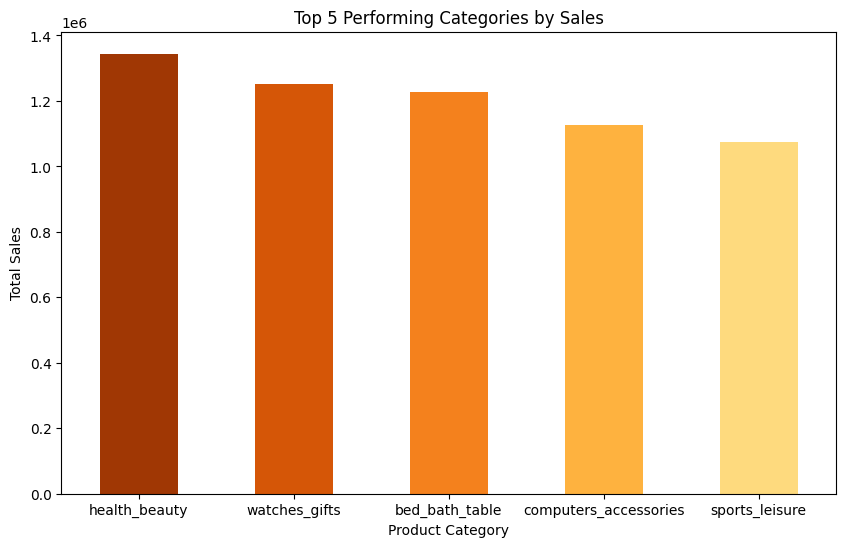

In [70]:
# Set the figure size for better readability
plt.figure(figsize=(10, 6))

# Create a bar chart
sales_performers['total_sales'].head(5).plot(kind='bar', color = sb.color_palette("YlOrBr_r"))

# Set the title and labels
plt.title('Top 5 Performing Categories by Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)

# Display the plot
plt.show()

### Sales Volume
is calculated by taking the aggregated order quantity, grouped by the product category.
We will then evaluate based on the top 5 Product Categories with highest sales volume.

In [71]:
# Group by product category and calculate the sales volume
volume_performance = LoMo_df.groupby('product_category_name_english').agg({
    'order_id': 'count',
}).rename(columns={
    'order_id': 'order_quantity',
})

volume_performance = volume_performance.sort_values('order_quantity',ascending = False)
volume_performance.head(5)

,order_quantity
product_category_name_english,
bed_bath_table,11097
health_beauty,9634
sports_leisure,8590
furniture_decor,8298
computers_accessories,7781


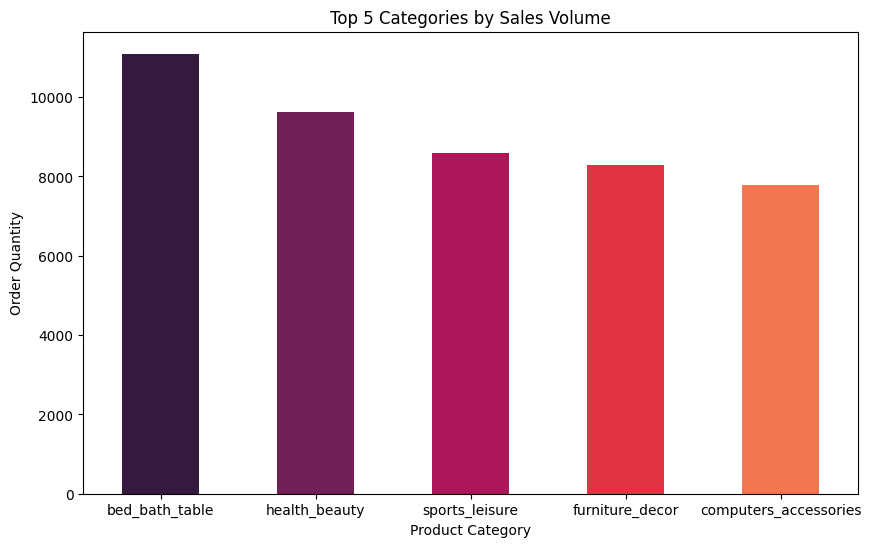

In [72]:
# Set the figure size for better readability
plt.figure(figsize=(10, 6))

# Create a bar chart
volume_performance['order_quantity'].head(5).plot(kind='bar', color=sb.color_palette("rocket"))

# Set the title and labels
plt.title('Top 5 Categories by Sales Volume')
plt.xlabel('Product Category')
plt.ylabel('Order Quantity')
plt.xticks(rotation=0)

# Display the plot
plt.show()

### Review Score
is calculated by taking the aggregated review score, grouped by the product category.
We will then evaluate based on the top 5 Product Categories with highest review score.

In [73]:
# Group by product category and calculate the average review score
review_score_cat = LoMo_df.groupby('product_category_name_english').agg({
    'review_score': 'mean',
    'order_id': 'count'
}).rename(columns={
    'review_score': 'avg_review_score',
    'order_id': 'count'
})

review_score_cat = review_score_cat.sort_values('avg_review_score',ascending = False).round(2)
review_score_cat

,avg_review_score,count
product_category_name_english,,
cds_dvds_musicals,4.64,14
fashion_children_clothes,4.50,8
books_general_interest,4.48,546
books_imported,4.40,60
construction_tools_tools,4.36,103
...,...,...
office_furniture,3.48,1690
portable_kitchen_and_food_preparation,3.43,14
home_comfort_2,3.37,30


### Performance Evaluation
based on sales revenue, sales volume and average review score, we can obtain a overview table with the 3 metrics.

In [74]:
# Create ranks for sales and volume performance
sales_performance['sales_rank'] = sales_performance['total_sales'].rank(ascending=False)
volume_performance['volume_rank'] = volume_performance['order_quantity'].rank(ascending=False)

# Merge the DataFrames
performance_df = sales_performance.merge(volume_performance, left_index=True, right_index=True)
performance_df = performance_df.merge(review_score_cat, left_index=True, right_index=True)

# Selecting relevant columns and rename
performance_df = performance_df[['total_sales', 'sales_rank', 'order_quantity',
                                 'volume_rank', 'avg_review_score']].reset_index()
performance_df.rename(columns={'index': 'category'}, inplace=True)
performance_df['average_revenue_per_order'] = (performance_df['total_sales']/performance_df['order_quantity']).round(2)

# Display the DataFrame
performance_df.sort_values('sales_rank').head(10)

,product_category_name_english,total_sales,sales_rank,order_quantity,volume_rank,avg_review_score,average_revenue_per_order
43,health_beauty,1344432.38,1.0,9634,2.0,4.13,139.55
72,watches_gifts,1252756.11,2.0,5970,7.0,4.01,209.84
7,bed_bath_table,1227770.84,3.0,11097,1.0,3.88,110.64
14,computers_accessories,1125354.95,4.0,7781,5.0,3.94,144.63
66,sports_leisure,1073535.20,5.0,8590,3.0,4.11,124.97
39,furniture_decor,926290.88,6.0,8298,4.0,3.90,111.63
49,housewares,744219.61,7.0,6915,6.0,4.06,107.62
5,auto,655864.50,8.0,4205,10.0,4.05,155.97
21,cool_stuff,642835.20,9.0,3780,12.0,4.14,170.06
42,garden_tools,575124.50,10.0,4328,9.0,4.04,132.88


In [75]:
performance_df.sort_values('avg_review_score', ascending=False)

,product_category_name_english,total_sales,sales_rank,order_quantity,volume_rank,avg_review_score,average_revenue_per_order
11,cds_dvds_musicals,820.00,71.0,14,69.0,4.64,58.57
28,fashion_children_clothes,569.85,72.0,8,71.5,4.50,71.23
8,books_general_interest,48998.21,36.0,546,27.0,4.48,89.74
9,books_imported,5258.22,58.0,60,58.0,4.40,87.64
20,construction_tools_tools,17359.55,51.0,103,53.0,4.36,168.54
...,...,...,...,...,...,...,...
56,office_furniture,392637.83,14.0,1690,19.0,3.48,232.33
61,portable_kitchen_and_food_preparation,3951.16,62.0,14,69.0,3.43,282.23
47,home_comfort_2,876.37,70.0,30,65.5,3.37,29.21
23,diapers_and_hygiene,2226.79,65.0,38,62.0,3.32,58.60


In [76]:
# Saving the DF into a CSV.
LoMo_df.to_csv('lomo_key_info.csv', index = False)

# Potential Analysis of Product Categories

Potential can be analysed by the sales trend over time.



In [77]:
# Convert order purchase timestamp to datetime for trend analysis
LoMo_df["order_purchase_timestamp"] = pd.to_datetime(LoMo_df["order_purchase_timestamp"], format="%d/%m/%Y %H:%M")

# Extract year and month for trend analysis
LoMo_df["year_month"] = LoMo_df["order_purchase_timestamp"].dt.to_period("M")

# Aggregate sales trends by category over time
category_trends = LoMo_df.groupby(["year_month", "product_category_name_english"]).agg(
    total_sales=("order_id", "count")
).reset_index()

# Identify high-growth categories by calculating percentage growth
category_trends["prev_month_sales"] = category_trends.groupby("product_category_name_english")["total_sales"].shift(1)
category_trends["sales_growth"] = ((category_trends["total_sales"] - category_trends["prev_month_sales"]) /
                                     category_trends["prev_month_sales"]) * 100

# Identify categories with the highest average monthly growth
growth_summary = category_trends.groupby("product_category_name_english")["sales_growth"].mean().reset_index()
growth_summary = growth_summary.sort_values(by="sales_growth", ascending=False)

# Display the results
growth_summary.head(10)

,product_category_name_english,sales_growth
13,computers,244.719431
3,arts_and_craftmanship,196.363636
39,furniture_decor,172.986197
27,fashion_bags_accessories,170.021919
61,portable_kitchen_and_food_preparation,125.000000
65,small_appliances_home_oven_and_coffee,91.095238
18,construction_tools_lights,87.260977
43,health_beauty,86.569960
57,party_supplies,84.848485
2,arts,83.521965


In [89]:
lomo_key_info_df = LoMo_df.copy()

# Convert order timestamp to datetime format
lomo_key_info_df["order_purchase_timestamp"] = pd.to_datetime(
    lomo_key_info_df["order_purchase_timestamp"], format="%d/%m/%Y %H:%M"
)

# Extract year-month for trend analysis
lomo_key_info_df["year_month"] = lomo_key_info_df["order_purchase_timestamp"].dt.to_period("M")

# Aggregate total orders & total sales per category by month
category_trends = lomo_key_info_df.groupby(["year_month", "product_category_name_english"]).agg(
    total_orders=("order_id", "count"),
    total_sales=("total_price", "sum")
).reset_index()

# Convert year_month to datetime and numeric format for regression
category_trends["year_month"] = category_trends["year_month"].astype(str)
category_trends["year_month"] = pd.to_datetime(category_trends["year_month"])
category_trends["time_numeric"] = (category_trends["year_month"] - category_trends["year_month"].min()).dt.days

# Compute trend slopes for each category
trend_slopes = {}

for category in category_trends["product_category_name_english"].unique():
    category_data = category_trends[category_trends["product_category_name_english"] == category]
    if len(category_data) > 1:  # Ensure there's enough data for regression
        slope, intercept, r_value, p_value, std_err = linregress(
            category_data["time_numeric"], category_data["total_sales"]
        )
        trend_slopes[category] = slope  # Slope represents growth rate

# Identify the category with the steepest growth
top_category_by_slope = max(trend_slopes, key=trend_slopes.get)

# Convert results into a DataFrame for review
slope_df = pd.DataFrame(list(trend_slopes.items()), columns=["Category", "Growth Slope"])
slope_df = slope_df.sort_values(by="Growth Slope", ascending=False)
slope_df.head(10)

,Category,Growth Slope
1,health_beauty,185.325801
30,watches_gifts,168.940532
6,bed_bath_table,125.842614
21,housewares,109.755412
27,sports_leisure,102.727811
9,computers_accessories,102.007547
0,furniture_decor,88.938501
4,auto,73.051026
5,baby,59.183762
33,construction_tools_construction,49.494037


In [87]:
# Compute trend slopes for each category based on total orders
trend_slopes_orders = {}

for category in category_trends["product_category_name_english"].unique():
    category_data = category_trends[category_trends["product_category_name_english"] == category]
    if len(category_data) > 1:  # Ensure there's enough data for regression
        slope, intercept, r_value, p_value, std_err = linregress(
            category_data["time_numeric"], category_data["total_orders"]  # Changed to total_orders
        )
        trend_slopes_orders[category] = slope  # Slope represents order growth rate

# Identify the category with the steepest growth in orders
top_category_by_orders = max(trend_slopes_orders, key=trend_slopes_orders.get)

# Convert results into a DataFrame for review
slope_orders_df = pd.DataFrame(list(trend_slopes_orders.items()), columns=["Category", "Orders Growth Slope"])
slope_orders_df = slope_orders_df.sort_values(by="Orders Growth Slope", ascending=False)

# Display results
print("Category with the steepest order growth trend:", top_category_by_orders)
slope_orders_df.head(10)  # Display top 10 categories by order growth rate


Category with the steepest order growth trend: health_beauty


,Category,Orders Growth Slope
1,health_beauty,1.292128
6,bed_bath_table,1.143932
30,watches_gifts,0.915314
21,housewares,0.869891
9,computers_accessories,0.866365
27,sports_leisure,0.813359
0,furniture_decor,0.690419
4,auto,0.586130
13,electronics,0.395172
28,telephony,0.394070


# Market Analysis and Strategy

## Merging the geolocation data with customer data.
The analysis and findings from geolocation details will be presented on a dashboard.

In [38]:
dfSummary(geolocation_df)

Dataset Shape: (7425, 16)


,Name,dtypes,Missing,Uniques
0,object_id,int64,0,7425
1,shape,object,0,1
2,admin0_name_en,object,0,1
3,admin0_name_th,object,0,1
4,admin0_pcode,object,0,1
5,admin1_name_en,object,0,77
6,admin1_name_th,object,0,77
7,admin1_pcode,object,0,77
8,admin2_name_en,object,0,918
9,admin2_name_th,object,0,923


### Dropping columns that are not needed.
These includes the administrative names in thai, and shape details. The dashboard will only require essential informations such as the administrative names 0 to 3.

In [39]:
geolocation_df = geolocation_df.drop(['shape','admin0_name_th',
                                      'admin1_name_th','admin2_name_th',
                                      'admin3_name_th','shape_length','shape_area','object_id'], axis = 1)

geolocation_df.head()

,admin0_name_en,admin0_pcode,admin1_name_en,admin1_pcode,admin2_name_en,admin2_pcode,admin3_name_en,admin3_pcode
0,Thailand,TH,Loei,TH42,Tha Li,TH4208,A Hi,TH420803
1,Thailand,TH,Pattani,TH94,Mueang Pattani,TH9401,A Noru,TH940102
2,Thailand,TH,Surin,TH32,Buachet,TH3213,A Phon,TH321305
3,Thailand,TH,Yala,TH95,Raman,TH9506,A Song,TH950615
4,Thailand,TH,Nan,TH55,Wiang Sa,TH5507,Ai Na Lai,TH550711


### Merging the geolocation data with customer data.
This will be done by matching of the primary key 'admin3_pcode', which is the zip code prefix in customer data.

In [40]:
dfSummary(customers_df)

Dataset Shape: (99441, 5)


,Name,dtypes,Missing,Uniques
0,customer_id,object,0,99441
1,customer_unique_id,object,0,96096
2,customer_zip_code_prefix,object,0,3453
3,customer_city,object,0,389
4,customer_state,object,0,69


In [ ]:
customers_df = pd.merge(customers_df, geolocation_df,
                        left_on='customer_zip_code_prefix',
                        right_on='admin3_pcode', how='left')

customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,admin0_name_en,admin0_pcode,admin1_name_en,admin1_pcode,admin2_name_en,admin2_pcode,admin3_name_en,admin3_pcode
0,8535e7d171732dcdb3de48ff99040f6c,05c0c68fbdf283e56b37df9f2d20245c,TH100101,Phra Nakhon,Bangkok,Thailand,TH,Bangkok,TH10,Phra Nakhon,TH1001,Phraborom Maharatchawang,TH100101
1,045ce65dc053765839733057c287dbcb,1f69219bc86e6918b4751692323de642,TH100101,Phra Nakhon,Bangkok,Thailand,TH,Bangkok,TH10,Phra Nakhon,TH1001,Phraborom Maharatchawang,TH100101
2,c754052065714c0e304de22a0e5b7749,31b5e7b0290cf70ac603e77f85efb53f,TH100101,Phra Nakhon,Bangkok,Thailand,TH,Bangkok,TH10,Phra Nakhon,TH1001,Phraborom Maharatchawang,TH100101
3,d707092bd024342cd484143f8fd20a55,3f6faa55fa7e82f1245fff7e2118663b,TH100101,Phra Nakhon,Bangkok,Thailand,TH,Bangkok,TH10,Phra Nakhon,TH1001,Phraborom Maharatchawang,TH100101
4,6a899e55865de6549a58d2c6845e5604,3fb97204945ca0c01bcf3eee6031c5f1,TH100101,Phra Nakhon,Bangkok,Thailand,TH,Bangkok,TH10,Phra Nakhon,TH1001,Phraborom Maharatchawang,TH100101


### Duplicated columns
Noting that 'admin1_name' is the same as 'customer_state' and 'admin2_name' is the same as 'customer_city', I will drop the duplicated columns.

I will also rename 'admin0_name_en' as 'customer_country' and 'admin3_name_en' as 'customer_district', for clearer representation.



In [ ]:
# Drop the duplicated columns 'admin1_name_en' and 'admin2_name_en'
customers_df.drop(['admin1_name_en', 'admin2_name_en','admin3_pcode','admin0_pcode','admin1_pcode',	'admin2_pcode'], axis = 1, inplace=True)

# Rename 'admin0_name_en' to 'customer_country' and 'admin3_name_en' to 'customer_district'
customers_df.rename(columns={
    'admin0_name_en': 'customer_country',
    'admin3_name_en': 'customer_district'
}, inplace=True)

customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_country,customer_district
0,8535e7d171732dcdb3de48ff99040f6c,05c0c68fbdf283e56b37df9f2d20245c,TH100101,Phra Nakhon,Bangkok,Thailand,Phraborom Maharatchawang
1,045ce65dc053765839733057c287dbcb,1f69219bc86e6918b4751692323de642,TH100101,Phra Nakhon,Bangkok,Thailand,Phraborom Maharatchawang
2,c754052065714c0e304de22a0e5b7749,31b5e7b0290cf70ac603e77f85efb53f,TH100101,Phra Nakhon,Bangkok,Thailand,Phraborom Maharatchawang
3,d707092bd024342cd484143f8fd20a55,3f6faa55fa7e82f1245fff7e2118663b,TH100101,Phra Nakhon,Bangkok,Thailand,Phraborom Maharatchawang
4,6a899e55865de6549a58d2c6845e5604,3fb97204945ca0c01bcf3eee6031c5f1,TH100101,Phra Nakhon,Bangkok,Thailand,Phraborom Maharatchawang


In [ ]:
column_order = [
    "customer_id",
    "customer_unique_id",
    "customer_zip_code_prefix",
    "customer_district",  # Move district before city
    "customer_city",
    "customer_state",
    "customer_country"
]

# Rearrange the columns
customers_df = customers_df[column_order]

customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_district,customer_city,customer_state,customer_country
0,8535e7d171732dcdb3de48ff99040f6c,05c0c68fbdf283e56b37df9f2d20245c,TH100101,Phraborom Maharatchawang,Phra Nakhon,Bangkok,Thailand
1,045ce65dc053765839733057c287dbcb,1f69219bc86e6918b4751692323de642,TH100101,Phraborom Maharatchawang,Phra Nakhon,Bangkok,Thailand
2,c754052065714c0e304de22a0e5b7749,31b5e7b0290cf70ac603e77f85efb53f,TH100101,Phraborom Maharatchawang,Phra Nakhon,Bangkok,Thailand
3,d707092bd024342cd484143f8fd20a55,3f6faa55fa7e82f1245fff7e2118663b,TH100101,Phraborom Maharatchawang,Phra Nakhon,Bangkok,Thailand
4,6a899e55865de6549a58d2c6845e5604,3fb97204945ca0c01bcf3eee6031c5f1,TH100101,Phraborom Maharatchawang,Phra Nakhon,Bangkok,Thailand


In [ ]:
# Saving the DF into a CSV.
customers_df.to_csv('customers_key_info.csv', index = False)

## Merging the geolocation data with seller data, closed deals and leads data.


### Geolocation data merging
This will be done by matching of the primary key 'admin3_pcode', which is the zip code prefix in seller data.

In [ ]:
dfSummary(sellers_df)


Dataset Shape: (3095, 7)


,Name,dtypes,Missing,Uniques
0,seller_id,object,0,3095
1,seller_zip_code_prefix_prep,object,0,2014
2,seller_city_prep,object,0,382
3,seller_state_prep,object,0,40
4,seller_zip_code_prefix,object,0,2014
5,seller_city,object,0,382
6,seller_state,object,0,40


In [ ]:
sellers_df.head()

,seller_id,seller_zip_code_prefix_prep,seller_city_prep,seller_state_prep,seller_zip_code_prefix,seller_city,seller_state
0,c2bda99904207edd1834f03e0022b007,TH100101,Phra Nakhon,Bangkok,TH100101,Phra Nakhon,Bangkok
1,788e857f317e53de488d393e65a80f45,TH100101,Phra Nakhon,Bangkok,TH100101,Phra Nakhon,Bangkok
2,713e3a23ca5e47786eb6f0d99f94cfac,TH100102,Phra Nakhon,Bangkok,TH100102,Phra Nakhon,Bangkok
3,cc80e2f693fa6e2408f47ccf62413fc1,TH100102,Phra Nakhon,Bangkok,TH100102,Phra Nakhon,Bangkok
4,a425f92c199eb576938df686728acd20,TH100102,Phra Nakhon,Bangkok,TH100102,Phra Nakhon,Bangkok


In [ ]:
# Removing duplicate prep columns
sellers_df = sellers_df.drop(['seller_zip_code_prefix_prep','seller_city_prep',
                              'seller_state_prep'], axis = 1)

sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,c2bda99904207edd1834f03e0022b007,TH100101,Phra Nakhon,Bangkok
1,788e857f317e53de488d393e65a80f45,TH100101,Phra Nakhon,Bangkok
2,713e3a23ca5e47786eb6f0d99f94cfac,TH100102,Phra Nakhon,Bangkok
3,cc80e2f693fa6e2408f47ccf62413fc1,TH100102,Phra Nakhon,Bangkok
4,a425f92c199eb576938df686728acd20,TH100102,Phra Nakhon,Bangkok


In [ ]:
# Merging with geolocation data to include district and country
sellers_merge = pd.merge(
    sellers_df,
    geolocation_df,
    left_on='seller_zip_code_prefix',
    right_on='admin3_pcode', how='left')

# Drop the 'admin3_pcode' as it is a duplicate of 'seller_zip_code_prefix'
sellers_merge.drop(columns=['admin0_pcode', 'admin1_name_en', 'admin1_pcode', 'admin2_name_en', 'admin2_pcode','admin3_pcode'], inplace=True)

# Rename 'admin0_name_en' to 'customer_country' and 'admin3_name_en' to 'customer_district'
sellers_merge.rename(
    columns={
        'admin0_name_en': 'seller_country',
        'admin3_name_en': 'seller_district'
    },inplace=True)


sellers_merge.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,seller_country,seller_district
0,c2bda99904207edd1834f03e0022b007,TH100101,Phra Nakhon,Bangkok,Thailand,Phraborom Maharatchawang
1,788e857f317e53de488d393e65a80f45,TH100101,Phra Nakhon,Bangkok,Thailand,Phraborom Maharatchawang
2,713e3a23ca5e47786eb6f0d99f94cfac,TH100102,Phra Nakhon,Bangkok,Thailand,Wang Burapha Phirom
3,cc80e2f693fa6e2408f47ccf62413fc1,TH100102,Phra Nakhon,Bangkok,Thailand,Wang Burapha Phirom
4,a425f92c199eb576938df686728acd20,TH100102,Phra Nakhon,Bangkok,Thailand,Wang Burapha Phirom


In [ ]:
column_order = [
    "seller_id",
    "seller_zip_code_prefix",
    "seller_district",
    "seller_city",
    "seller_state",
    "seller_country"
]

# Rearrange the columns
sellers_merge = sellers_merge[column_order]
sellers_merge

,seller_id,seller_zip_code_prefix,seller_district,seller_city,seller_state,seller_country
0,c2bda99904207edd1834f03e0022b007,TH100101,Phraborom Maharatchawang,Phra Nakhon,Bangkok,Thailand
1,788e857f317e53de488d393e65a80f45,TH100101,Phraborom Maharatchawang,Phra Nakhon,Bangkok,Thailand
2,713e3a23ca5e47786eb6f0d99f94cfac,TH100102,Wang Burapha Phirom,Phra Nakhon,Bangkok,Thailand
3,cc80e2f693fa6e2408f47ccf62413fc1,TH100102,Wang Burapha Phirom,Phra Nakhon,Bangkok,Thailand
4,a425f92c199eb576938df686728acd20,TH100102,Wang Burapha Phirom,Phra Nakhon,Bangkok,Thailand
...,...,...,...,...,...,...
3090,4f1f1c8666cdb6442f775c4e8caed465,TH520508,Ban Haeng,Ngao,Lampang,Thailand
3091,f0837c8d71434931d9e38e7b79234797,TH520510,Mae Tip,Ngao,Lampang,Thailand
3092,1660ad786c27fd935378b6192a90b417,TH520605,Mueang Mai,Chae Hom,Lampang,Thailand
3093,3c010235b7345c92f125d14ee232a76b,TH520802,Mae Wa,Thoen,Lampang,Thailand


In [ ]:
dfSummary(sellers_merge)

Dataset Shape: (3095, 6)


,Name,dtypes,Missing,Uniques
0,seller_id,object,0,3095
1,seller_zip_code_prefix,object,0,2014
2,seller_district,object,0,1759
3,seller_city,object,0,382
4,seller_state,object,0,40
5,seller_country,object,0,1


### Merging of closed deals and MQL data.
this is done by the matching of primary key mql_id.

In [ ]:
# Merge the 2 dfs
closed_deals_leads_df = pd.merge(closed_deals_df,
                                 marketing_qualified_leads_df[['mql_id','first_contact_date','origin']],
                                 on= 'mql_id', how = 'left')

closed_deals_leads_df.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,average_stock,business_type_org,declared_product_catalog_size,declared_monthly_revenue,first_contact_date,origin
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,26/02/2018 19:58,pet,online_medium,captain_america,False,above 100,reseller,400,"3,000",21/02/2018,organic_search
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,08/05/2018 20:17,car_accessories,industry,hawkeye,True,above 100,reseller,600,"6,000",04/04/2018,referral
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,05/06/2018 17:27,home_appliances,online_big,captain_america,False,above 100,reseller,700,"4,000",03/04/2018,organic_search
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,17/01/2018 13:51,food_drink,online_small,scarlet_witch,True,above 100,reseller,700,"2,000",14/01/2018,paid_search
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,03/07/2018 20:17,home_appliances,industry,iron_man,False,below 100,manufacturer,300,"3,000",09/10/2017,unknown


In [ ]:
# Drop the columns not needed
closed_deals_leads_df = closed_deals_leads_df.drop(['sdr_id','sr_id'], axis=1)

### Merging of closed deals with leads and seller data.
this is done by the matching of primary key seller_id.

In [ ]:
seller_key_info = pd.merge(sellers_merge,
                           closed_deals_leads_df,
                           on= 'seller_id',
                           how= 'left')
seller_key_info.head()

,seller_id,seller_zip_code_prefix,seller_district,seller_city,seller_state,seller_country,mql_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,average_stock,business_type_org,declared_product_catalog_size,declared_monthly_revenue,first_contact_date,origin
0,c2bda99904207edd1834f03e0022b007,TH100101,Phraborom Maharatchawang,Phra Nakhon,Bangkok,Thailand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,788e857f317e53de488d393e65a80f45,TH100101,Phraborom Maharatchawang,Phra Nakhon,Bangkok,Thailand,c14a716bc18a0f87296c2ec10bfe8929,05/04/2018 14:44,bags_backpacks,online_medium,iron_man,True,above 100,manufacturer,600,"8,000",03/04/2018,organic_search
2,713e3a23ca5e47786eb6f0d99f94cfac,TH100102,Wang Burapha Phirom,Phra Nakhon,Bangkok,Thailand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cc80e2f693fa6e2408f47ccf62413fc1,TH100102,Wang Burapha Phirom,Phra Nakhon,Bangkok,Thailand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,a425f92c199eb576938df686728acd20,TH100102,Wang Burapha Phirom,Phra Nakhon,Bangkok,Thailand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfSummary(seller_key_info)

Dataset Shape: (3095, 18)


,Name,dtypes,Missing,Uniques
0,seller_id,object,0,3095
1,seller_zip_code_prefix,object,0,2014
2,seller_district,object,0,1759
3,seller_city,object,0,382
4,seller_state,object,0,40
5,seller_country,object,0,1
6,mql_id,object,2715,380
7,won_date,object,2715,370
8,business_segment,object,2715,29
9,lead_type,object,2715,8


In [ ]:
# Saving the DF into a CSV.
seller_key_info.to_csv('sellers_key_info.csv', index = False)

## Saving relevant dataframes


In [ ]:
LoMo_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_price,review_id,review_score,time_to_review
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,19/09/2017 09:45,58.90,13.29,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,13/09/2017 08:59,13/09/2017 09:45,19/09/2017 18:34,20/09/2017 23:43,29/09/2017 00:00,58.90,97ca439bc427b48bc1cd7177abe71365,5,1.456250
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,03/05/2017 11:05,239.90,19.93,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,delivered,26/04/2017 10:53,26/04/2017 11:05,04/05/2017 14:35,12/05/2017 16:04,15/05/2017 00:00,239.90,7b07bacd811c4117b742569b04ce3580,4,2.481944
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,18/01/2018 14:48,199.00,17.87,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,delivered,14/01/2018 14:33,14/01/2018 14:48,16/01/2018 12:36,22/01/2018 13:19,05/02/2018 00:00,199.00,0c5b33dea94867d1ac402749e5438e8b,5,0.670833
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,15/08/2018 10:10,12.99,12.79,perfumery,d4eb9395c8c0431ee92fce09860c5a06,delivered,08/08/2018 10:00,08/08/2018 10:10,10/08/2018 13:28,14/08/2018 13:32,20/08/2018 00:00,12.99,f4028d019cb58564807486a6aaf33817,4,0.693750
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,13/02/2017 13:57,199.90,18.14,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,delivered,04/02/2017 13:57,04/02/2017 14:10,16/02/2017 09:46,01/03/2017 16:42,17/03/2017 00:00,199.90,940144190dcba6351888cafa43f3a3a5,5,1.454167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110513,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,02/05/2018 04:11,299.99,43.41,housewares,b51593916b4b8e0d6f66f2ae24f2673d,delivered,23/04/2018 13:57,25/04/2018 04:11,25/04/2018 12:09,10/05/2018 22:56,18/05/2018 00:00,299.99,9185f849f32d82e216a4e025e0c50f5c,5,3.536806
110514,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,20/07/2018 04:31,350.00,36.53,computers_accessories,84c5d4fbaf120aae381fad077416eaa0,delivered,14/07/2018 10:26,17/07/2018 04:31,17/07/2018 08:05,23/07/2018 20:31,01/08/2018 00:00,350.00,be803f6a93d64719fd685c1cc610918a,5,1.392361
110515,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,30/10/2017 17:14,99.90,16.95,sports_leisure,29309aa813182aaddc9b259e31b870e6,delivered,23/10/2017 17:07,24/10/2017 17:14,26/10/2017 15:13,28/10/2017 12:22,10/11/2017 00:00,99.90,dbdd81cd59a1a9f94a10a990b4d48dce,5,0.897917
110516,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,21/08/2017 00:04,55.99,8.72,computers_accessories,b5e6afd5a41800fdf401e0272ca74655,delivered,14/08/2017 23:02,15/08/2017 00:04,15/08/2017 19:02,16/08/2017 21:59,25/08/2017 00:00,55.99,fba117c9ac40d41ca7be54741f471303,5,1.516667


In [ ]:
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_district,customer_city,customer_state,customer_country
0,8535e7d171732dcdb3de48ff99040f6c,05c0c68fbdf283e56b37df9f2d20245c,TH100101,Phraborom Maharatchawang,Phra Nakhon,Bangkok,Thailand
1,045ce65dc053765839733057c287dbcb,1f69219bc86e6918b4751692323de642,TH100101,Phraborom Maharatchawang,Phra Nakhon,Bangkok,Thailand
2,c754052065714c0e304de22a0e5b7749,31b5e7b0290cf70ac603e77f85efb53f,TH100101,Phraborom Maharatchawang,Phra Nakhon,Bangkok,Thailand
3,d707092bd024342cd484143f8fd20a55,3f6faa55fa7e82f1245fff7e2118663b,TH100101,Phraborom Maharatchawang,Phra Nakhon,Bangkok,Thailand
4,6a899e55865de6549a58d2c6845e5604,3fb97204945ca0c01bcf3eee6031c5f1,TH100101,Phraborom Maharatchawang,Phra Nakhon,Bangkok,Thailand
...,...,...,...,...,...,...,...
99436,1dbe0bf136ea8849ed9648546ebc2e63,bd0d97c6af77a1ef4850255bd6d17fec,TH960905,Rom Sai,Sukhirin,Narathiwat,Thailand
99437,f4bc36ec33804416487b2a7051214db6,e613f7834ff4bd901915744d6b7a1a83,TH960905,Rom Sai,Sukhirin,Narathiwat,Thailand
99438,88c36fbd3df96094f90f0315e1d2dd90,e629cd3ff381ad0a234016fa7dd76f46,TH960905,Rom Sai,Sukhirin,Narathiwat,Thailand
99439,a01fcde31529708c8755a0226631c0d7,f34fd449c1a6da5fbf276eada6a5fba2,TH960905,Rom Sai,Sukhirin,Narathiwat,Thailand


In [ ]:
seller_key_info

,seller_id,seller_zip_code_prefix,seller_district,seller_city,seller_state,seller_country,mql_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,average_stock,business_type_org,declared_product_catalog_size,declared_monthly_revenue,first_contact_date,origin
0,c2bda99904207edd1834f03e0022b007,TH100101,Phraborom Maharatchawang,Phra Nakhon,Bangkok,Thailand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,788e857f317e53de488d393e65a80f45,TH100101,Phraborom Maharatchawang,Phra Nakhon,Bangkok,Thailand,c14a716bc18a0f87296c2ec10bfe8929,05/04/2018 14:44,bags_backpacks,online_medium,iron_man,True,above 100,manufacturer,600,"8,000",03/04/2018,organic_search
2,713e3a23ca5e47786eb6f0d99f94cfac,TH100102,Wang Burapha Phirom,Phra Nakhon,Bangkok,Thailand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cc80e2f693fa6e2408f47ccf62413fc1,TH100102,Wang Burapha Phirom,Phra Nakhon,Bangkok,Thailand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,a425f92c199eb576938df686728acd20,TH100102,Wang Burapha Phirom,Phra Nakhon,Bangkok,Thailand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,4f1f1c8666cdb6442f775c4e8caed465,TH520508,Ban Haeng,Ngao,Lampang,Thailand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3091,f0837c8d71434931d9e38e7b79234797,TH520510,Mae Tip,Ngao,Lampang,Thailand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3092,1660ad786c27fd935378b6192a90b417,TH520605,Mueang Mai,Chae Hom,Lampang,Thailand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3093,3c010235b7345c92f125d14ee232a76b,TH520802,Mae Wa,Thoen,Lampang,Thailand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

# Save all DataFrames to an Excel file with separate sheets
output_file = "lomo_data.xlsx"

with pd.ExcelWriter(output_file, engine="xlsxwriter") as writer:

    LoMo_df.to_excel(writer, sheet_name="Lomo Key Info", index=False)
    customers_df.to_excel(writer, sheet_name="Customer Key Info", index=False)
    seller_key_info.to_excel(writer, sheet_name="Seller Key Info", index=False)




In [ ]:
# Load your dataset
df = pd.read_csv("lomo_key_info.csv")

# Convert to datetime format
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"], format="%d/%m/%Y %H:%M")

# Create a new column for Year-Month
df["year_month"] = df["order_purchase_timestamp"].dt.to_period("M").astype(str)

# Create a new DataFrame with all unique product categories and month combinations
all_months = pd.date_range(start=df["order_purchase_timestamp"].min(),
                           end=df["order_purchase_timestamp"].max(),
                           freq="MS").strftime("%Y-%m").tolist()

categories = df["product_category_name_english"].unique()

# Create a DataFrame with all possible category-month combinations
all_combinations = pd.MultiIndex.from_product([categories, all_months], names=["product_category_name_english", "year_month"])
df_filled = pd.DataFrame(index=all_combinations).reset_index()

# Merge with the original dataset
df_merged = df_filled.merge(df.groupby(["year_month", "product_category_name_english"])["total_price"].sum().reset_index(),
                            on=["year_month", "product_category_name_english"], how="left")

# Fill missing values with 0 (no sales in those months)
df_merged["total_price"].fillna(0, inplace=True)

# Sort by category and date
df_merged = df_merged.sort_values(by=["product_category_name_english", "year_month"])

# Calculate Previous Month Revenue
df_merged["prev_month_revenue"] = df_merged.groupby("product_category_name_english")["total_price"].shift(1)

# Calculate MoM Revenue Growth %
df_merged["revenue_growth"] = ((df_merged["total_price"] - df_merged["prev_month_revenue"]) /
                               df_merged["prev_month_revenue"]) * 100

# Fill NaN values in the first month
df_merged["revenue_growth"].fillna(0, inplace=True)

# Save the cleaned dataset for Power BI
df_merged.to_csv("cleaned_growth_data.csv", index=False)

# Display the first few rows
df_merged.head()


<ipython-input-43-e809f1d7878d>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged["total_price"].fillna(0, inplace=True)
<ipython-input-43-e809f1d7878d>:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,product_category_name_english,year_month,total_price,prev_month_revenue,revenue_growth
384,agro_industry_and_commerce,2016-10,0.00,NaN,0.000000
385,agro_industry_and_commerce,2016-11,0.00,0.00,0.000000
386,agro_industry_and_commerce,2016-12,0.00,0.00,0.000000
387,agro_industry_and_commerce,2017-01,87.96,0.00,inf
388,agro_industry_and_commerce,2017-02,224.84,87.96,155.616189
